In [31]:
import pandas as pd
import numpy as np

In [32]:
# Load Data 
df = pd.read_csv("data.csv")
df.head()

,user_id,session_id,session_duration,decision_count,undo_count,error_rate,break_taken,time_of_day,fatigue_score,fatigue_level
0,1,0,120,105,11,0.10,0,Evening,83.4,High
1,1,1,72,32,6,0.06,0,Evening,37.4,Medium
2,1,2,136,15,14,0.14,0,Afternoon,53.8,Medium
3,1,3,138,89,7,0.31,0,Morning,82.9,High
4,1,4,49,73,8,0.33,0,Morning,50.4,Medium


## Prepare Machine Learning Data

In [33]:
df_ml = df.drop(columns=['fatigue_score', 'user_id', 'session_id'])
# I removed the engineerd fatigue_score to prevent data leakage

In [34]:
df_ml.columns

Index(['session_duration', 'decision_count', 'undo_count', 'error_rate',
       'break_taken', 'time_of_day', 'fatigue_level'],
      dtype='object')

In [35]:
X = df[['session_duration',
        'decision_count',
        'undo_count',
        'error_rate',
        'break_taken',
        'time_of_day']]
        
y = df_ml['fatigue_level']

In [36]:
X = pd.get_dummies(X, columns=['time_of_day'], drop_first=True)

## Encode Target variable

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_map

{'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}

## Train & Test Split


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

## Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(np.mean(X_train_scaled, axis=0))
print(np.std(X_test_scaled, axis=0))

[ 6.14302077e-17  3.07151039e-17  7.55079636e-17 -7.42281676e-17
 -5.11918398e-18  4.15933698e-17 -1.02383680e-16]
[0.96013131 1.03970452 1.00317842 1.03133483 1.02012274 1.00626768
 1.00194378]


## Basic Model 
### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

lr.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [42]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0,
       1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0,
       2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2,
       1, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2,

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       0.89      1.00      0.94        51
           2       1.00      0.95      0.98       165

    accuracy                           0.98       347
   macro avg       0.96      0.98      0.97       347
weighted avg       0.98      0.98      0.98       347

[[131   0   0]
 [  0  51   0]
 [  2   6 157]]


## Advanced Model – Random Forest Classifier
Baseline logistic regression provided strong performance.
Next, a non-linear ensemble model is trained to capture complex behavioral interactions.


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

y_pred_rf

array([0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0,
       1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2,

## Evaluation

In [45]:
print("RandomForestClassifier")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       0.89      1.00      0.94        51
           2       1.00      0.95      0.98       165

    accuracy                           0.98       347
   macro avg       0.96      0.98      0.97       347
weighted avg       0.98      0.98      0.98       347

[[131   0   0]
 [  0  51   0]
 [  2   6 157]]


## Compare the logitic & Random Forest Models

In [46]:
from sklearn.metrics import f1_score

print("LogisticRegression F1:", f1_score(y_test, y_pred, average='weighted'))
print("RandomForestClassifir F1:", f1_score(y_test, y_pred_rf, average='weighted'))

LogisticRegression F1: 0.9771609900353165
RandomForestClassifir F1: 0.9220387650754768


## Feature Importance

In [47]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

session_duration       0.412788
decision_count         0.355742
break_taken            0.081666
error_rate             0.066124
undo_count             0.065477
time_of_day_Evening    0.009410
time_of_day_Morning    0.008793
dtype: float64

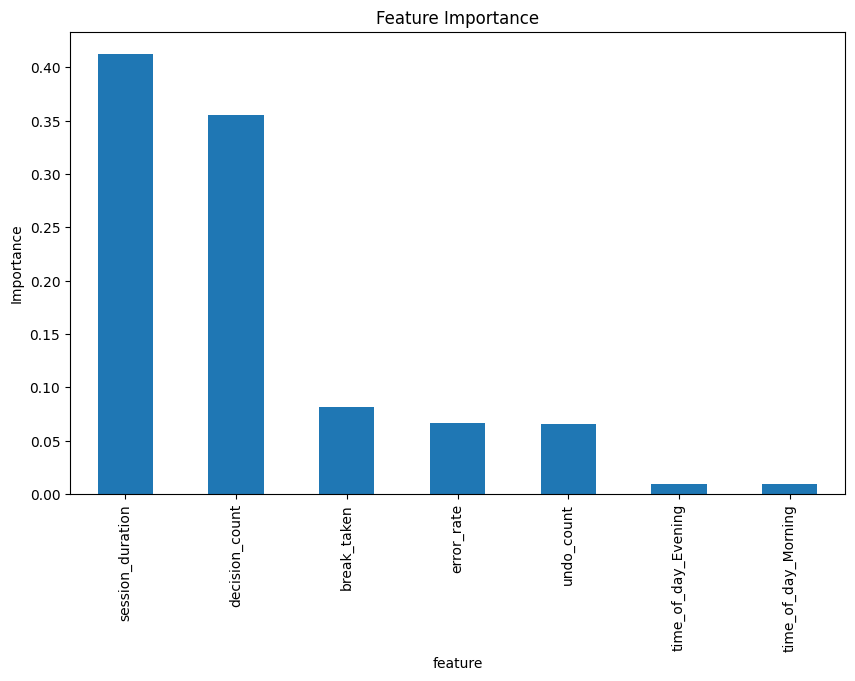

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel("feature")
plt.ylabel('Importance')
plt.show()

## Feature Importance Insights

- `error_rate` is the most influential feature, indicating that mistakes strongly
correlate with cognitive fatigue.

- `decision_count` and session_duration are key contributors, suggesting prolonged
decision-making increases fatigue.

- `break_taken` has lower importance, likely because its effect is indirect.

- `Time-of-day` features show moderate influence, reflecting circadian effects.

## Compare With Logistic Model

In [55]:
coef = pd.DataFrame({
    'Feature' : X.columns,
    'Logistic_coefficiant' : lr.coef_[0],
    'RandomForest_coefficiant' : rf.feature_importances_[0]
}).sort_values(by='Logistic_coefficiant', ascending=False)

coef

,Feature,Logistic_coefficiant,RandomForest_coefficiant
0,session_duration,5.955600,0.412788
1,decision_count,5.351416,0.412788
2,undo_count,0.882211,0.412788
3,error_rate,0.441661,0.412788
6,time_of_day_Morning,0.047410,0.412788
5,time_of_day_Evening,0.045084,0.412788
4,break_taken,-2.938490,0.412788


## Model Selection Conclusion

- Although Random Forest provided useful feature importance insights,
- Logistic Regression achieved a higher F1-score and demonstrated better
- generalization. Therefore, Logistic Regression was selected as the final model.


## XGBoost Model for training and SHAP analysis

In [56]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective = 'multi:softprob',
    num_class = 3,
    max_depth = 6,
    learning_rate = 0.5,
    n_estimators = 300,
    subsample = 0.8,
    colsample_bytree = 0.8,
    eval_metric = 'mlogloss',
    random_state = 42
)

xgb.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

In [61]:
from sklearn.metrics import classification_report, f1_score

y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

print(
    "XGBoost F1:",
    f1_score(y_test, y_pred_xgb, average='weighted')
)
print("LogisticRegression F1:", f1_score(y_test, y_pred, average='weighted'))
print("RandomForestClassifir F1:", f1_score(y_test, y_pred_rf, average='weighted'))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       131
           1       0.98      0.86      0.92        51
           2       0.91      0.96      0.93       165

    accuracy                           0.93       347
   macro avg       0.95      0.92      0.93       347
weighted avg       0.94      0.93      0.93       347

XGBoost F1: 0.9336266200220193
LogisticRegression F1: 0.9771609900353165
RandomForestClassifir F1: 0.9220387650754768


### Shap Explainability

In [63]:
import shap

explainer = shap.LinearExplainer(
    lr, 
    X_train_scaled,
    feature_perturbation = 'interventional'
)

shap_values = explainer.shap_values(X_test_scaled)

## SHAP Feature Importance (Bar)

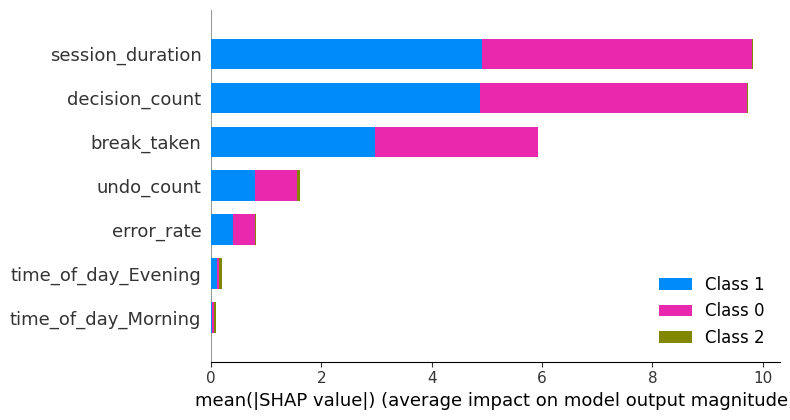

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
shap.summary_plot(
    shap_values,
    X_train,
    plot_type="bar",
    show=False
)
plt.show()

## SHAP Explainability (Final Model)

- SHAP was applied to the final Logistic Regression model to provide a unified and
transparent explanation of fatigue predictions. Although Logistic Regression
is inherently interpretable, SHAP was used to validate feature impact and
maintain consistency with explainability methods used for tree-based models.

- Global SHAP analysis shows that error_rate, decision_count, and session_duration
are the strongest contributors to high fatigue predictions, while taking breaks
reduces fatigue risk. Local explanations further demonstrate how individual
session behaviors lead to fatigue classification.
